In [ ]:

# get the pascal voc dataset
!wget 'http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar'

!tar -xvf /content/VOCtrainval_11-May-2012.tar
!rm -rf VOCtrainval_11-May-2012.tar

Streaming output truncated to the last 5000 lines.
VOCdevkit/VOC2012/SegmentationClass/2008_001874.png
VOCdevkit/VOC2012/SegmentationClass/2008_001876.png
VOCdevkit/VOC2012/SegmentationClass/2008_001882.png
VOCdevkit/VOC2012/SegmentationClass/2008_001885.png
VOCdevkit/VOC2012/SegmentationClass/2008_001895.png
VOCdevkit/VOC2012/SegmentationClass/2008_001896.png
VOCdevkit/VOC2012/SegmentationClass/2008_001926.png
VOCdevkit/VOC2012/SegmentationClass/2008_001966.png
VOCdevkit/VOC2012/SegmentationClass/2008_001971.png
VOCdevkit/VOC2012/SegmentationClass/2008_001992.png
VOCdevkit/VOC2012/SegmentationClass/2008_001997.png
VOCdevkit/VOC2012/SegmentationClass/2008_002032.png
VOCdevkit/VOC2012/SegmentationClass/2008_002043.png
VOCdevkit/VOC2012/SegmentationClass/2008_002064.png
VOCdevkit/VOC2012/SegmentationClass/2008_002066.png
VOCdevkit/VOC2012/SegmentationClass/2008_002067.png
VOCdevkit/VOC2012/SegmentationClass/2008_002073.png
VOCdevkit/VOC2012/SegmentationClass/2008_002079.png
VOCdevkit/VOC

In [ ]:

# prepare subset's dir
!mkdir images_set3
%cd images_set3
!mkdir test
!mkdir train

/content/images_set3


In [ ]:
# take specific number of specific classes from Pascal VOC dataset
%cd ..

import os
import xml.etree.ElementTree as ET
from shutil import copyfile
from os.path import isfile, join

# use 4 classes: horse, cow, sheep and person
classesINeed = ['horse', 'cow', 'sheep', 'person']

fileDict_train = {}
fileDict_test = {}

# one dictionary for each class
for cl in classesINeed:
    fileDict_train[cl] = []

for cl2 in classesINeed:
    fileDict_test[cl2] = []

# define the relevant directories
xmlDirectory = '/content/VOCdevkit/VOC2012/Annotations/'
modifiedXmlDir_train = '/content/images_set3/train/'
modifiedXmlDir_test = '/content/images_set3/test/'
JPEGdirectory = '/content/VOCdevkit/VOC2012/JPEGImages/'
modifiedJPEGdir_train = '/content/images_set3/train/'
modifiedJPEGdir_test = '/content/images_set3/test/'

# the number of images per class for train and test sets
imgnum_train = 450
imgnum_test = 50

# check how many images and annotations exist in total in downloaded Pascal VOC
print('Total number of Pascal VOC images:', len(os.listdir(JPEGdirectory)))
print('Total number of Pascal VOC annotations:', len(os.listdir(xmlDirectory)))

# all xml files into a list
onlyfiles = [f for f in os.listdir(xmlDirectory) if isfile(join(xmlDirectory,f))]

# for all xml files
for filename in onlyfiles:
  filelink = join(xmlDirectory,filename)
  tree = ET.parse(filelink)
  root = tree.getroot()
  objs = root.findall('object')

  for obj in objs:
    currentObj = obj.find('name').text

    if currentObj in classesINeed:
        # train set
        # for images with many objects, keep their filename just one time
        if filename not in fileDict_train[currentObj] and len(fileDict_train[currentObj]) <= (imgnum_train - 1) :   # because pointer of dictionary starts from 0
            # take different images between train and test sets
            if filename not in fileDict_test[currentObj]:
              # write the xml file to modifiedXmlDir
              fileDict_train[currentObj].append(filename)
              fwrite = open(modifiedXmlDir_train + filename , 'wb')
              tree.write(fwrite)
              fwrite.close()
              # copy the corresponding JPEG to modifiedJPEGDir
              copyfile(JPEGdirectory + filename[:-3] + 'jpg', modifiedJPEGdir_train + filename[:-3] + 'jpg')
        # test set
        elif filename not in fileDict_test[currentObj] and len(fileDict_test[currentObj]) <= (imgnum_test - 1) :    # because pointer of dictionary starts from 0
            # take different images between train and test sets
            if filename not in fileDict_train[currentObj]:
                # write the xml file to modifiedXmlDir
                fileDict_test[currentObj].append(filename)
                fwrite = open(modifiedXmlDir_test + filename , 'wb')
                tree.write(fwrite)
                fwrite.close()
                # copy the corresponding JPEG to modifiedJPEGDir
                copyfile(JPEGdirectory + filename[:-3] + 'jpg', modifiedJPEGdir_test + filename[:-3] + 'jpg')

# check if the numbers are what we expect

print('Total number of images for training:', len(os.listdir(modifiedJPEGdir_train)))
print('Total number of annotations of images for training:', len(os.listdir(modifiedXmlDir_train)))

print('Total number of images for testing:', len(os.listdir(modifiedJPEGdir_test)))
print('Total number of annotations of images for testing:', len(os.listdir(modifiedXmlDir_test)))


/content
Total number of Pascal VOC images: 17125
Total number of Pascal VOC annotations: 17125
Total number of images for training: 3154
Total number of annotations of images for training: 3154
Total number of images for testing: 200
Total number of annotations of images for testing: 200


In [ ]:

# save subset to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

!cp -r images_set3 /content/drive/MyDrive

In [ ]:
# get retinanet and install the appropriate environment

!git clone https://github.com/fizyr/keras-retinanet.git

%cd keras-retinanet/

!pip install .

!python setup.py build_ext --inplace

import os
import shutil
import zipfile
import urllib
import xml.etree.ElementTree as ET
import numpy as np
import csv
import pandas
from google.colab import drive
from google.colab import files

Cloning into 'keras-retinanet'...
remote: Enumerating objects: 6224, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 6224 (delta 6), reused 6 (delta 2), pack-reused 6205
Receiving objects: 100% (6224/6224), 13.48 MiB | 18.81 MiB/s, done.
Resolving deltas: 100% (4207/4207), done.
/content/keras-retinanet
Processing /content/keras-retinanet
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for keras-retinanet: filename=keras_retinanet-1.0.0-cp310-cp310-linux_x86_64.whl size=177774 sha256=da691b4490e3e43d1623c24827241ff8e5f605c3381f8fa53b169e040e2a7e81
  Stored in directory: /root/.cache/pip/wheels/30/a8/71/bccf2f8331abdd2183df34261c5faea07ce65324a12c97af2e
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20459 sha256=7f4e076b9f46869a06b6fe33100eb08ffc141bf87e307dc94bc74ce21270731a
  Stored in directory: /root/.cache/pip/wheels/16/af/88/

In [ ]:
# mount drive to get the dataset
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

# copy dataset to Colab VM
%cd /content/drive/MyDrive/
!cp -r images_set3 /content/keras-retinanet/images/

/content/drive/MyDrive


In [ ]:
# create annotations.csv and classes.csv files
%cd /content/keras-retinanet/images/images_set3

import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET

# annotation csvs
def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            value = (root.find('filename').text,
                     int(root.find('size')[0].text),
                     int(root.find('size')[1].text),
                     member[0].text,
                     int(member.find("bndbox").find('xmin').text),
                     int(member.find("bndbox").find('ymin').text),
                     int(member.find("bndbox").find('xmax').text),
                     int(member.find("bndbox").find('ymax').text))
            xml_list.append(value)
    column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df


def main():
    datasets = ['train', 'test']
    for ds in datasets:
      image_path = os.path.join(os.getcwd(), ds)
      xml_df = xml_to_csv(image_path)
      xml_df.to_csv(ds + '_annotations.csv', index=None)
print('Successfully converted xml to csv.')

main()

# classes csv
classes = [['cow',0], ['horse',1], ['sheep',2], ['person',3]]

with open('classes.csv', 'w', newline='') as f:
  writer = csv.writer(f)
  #writer.writerow(["class_name", "class_id"])
  writer.writerows(classes)
print('Successfully created classes.csv file')

/content/keras-retinanet/images/images_set3
Successfully converted xml to csv.


ParseError: ignored

In [ ]:
# transform csvs to retinanet csv format. More info about retina's csv format here: https://github.com/fizyr/keras-retinanet

csv_files = ['train_annotations.csv', 'test_annotations.csv']

for csv_file in csv_files:
  f = pd.read_csv(csv_file)
  # keep filename, xmin, ymin, xmax, ymax, class columns
  keep_col = ['filename', 'xmin', 'ymin', 'xmax', 'ymax', 'class']
  tmp = f[keep_col]
  # skip the header row from top
  tmp.columns = tmp.iloc[0]
  final = tmp[1:]
  final.to_csv('retinanet_'+csv_file, index=False)


In [ ]:
# keep rows with objects that belong in our classes_list

retinanet_csv_files = ['retinanet_train_annotations.csv', 'retinanet_test_annotations.csv']
classes_list = ['cow', 'horse', 'sheep', 'person']

with open('retinanet_train_annotations.csv', 'r') as inp, open('final_retinanet_train_annotations.csv', 'w') as out:
    writer = csv.writer(out)
    for row in csv.reader(inp):
        if row[5] in classes_list:
            writer.writerow(row)

with open('retinanet_test_annotations.csv', 'r') as inp, open('final_retinanet_test_annotations.csv', 'w') as out:
    writer = csv.writer(out)
    for row in csv.reader(inp):
        if row[5] in classes_list:
            writer.writerow(row)

# move csvs in train/test images dirs
!mv final_retinanet_train_annotations.csv /content/keras-retinanet/images/images_set3/train
!mv final_retinanet_test_annotations.csv /content/keras-retinanet/images/images_set3/test


In [ ]:
# download the pre-trained model
import urllib.request

PRETRAINED_MODEL = '/content/keras-retinanet/snapshots/_pretrained_model.h5'

URL_MODEL = 'https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5'
urllib.request.urlretrieve(URL_MODEL, PRETRAINED_MODEL)


('/content/keras-retinanet/snapshots/_pretrained_model.h5',
 <http.client.HTTPMessage at 0x7ca46f3fa6b0>)

In [ ]:
# total training time
!pip install ipython-autotime

%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.1 MB/s eta 0:00:00
time: 312 µs (started: 2023-07-29 11:26:52 +00:00)


In [ ]:
%cd /content/keras-retinanet/images/images_set3

/content/keras-retinanet/images/images_set3
time: 2.43 ms (started: 2023-07-29 11:26:57 +00:00)


In [ ]:
# define steps_per_epoch = len(X_train)//batch_size
batch_size = 6
print( len(os.listdir('/content/keras-retinanet/images/images_set3/train'))/2  // batch_size) # remember that train folder contains image

354.0
time: 7.91 ms (started: 2023-07-29 11:27:00 +00:00)


In [ ]:
# start training
%cd /content/keras-retinanet/keras_retinanet/bin

!python train.py --freeze-backbone --random-transform --weights {PRETRAINED_MODEL} --batch-size 6 --steps 29 --epochs 5 csv /content/keras-retinanet/images/images_set3/train/final_retinanet_train_annotations.csv /content/keras-retinanet/images/images_set3/classes.csv



/content/keras-retinanet/keras_retinanet/bin
2023-07-29 11:27:05.134986: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-29 11:27:07.073117: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Creating model, this may take a second...
2023-07-29 11:27:11.226787: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-29 11:27:11.812918: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS

In [ ]:
# convert training model to inference model
!python convert_model.py /content/keras-retinanet/keras_retinanet/bin/snapshots/resnet50_csv_05.h5 /content/keras-retinanet/keras_retinanet/bin/snapshots/my_resnet50_csv_05.h5


2023-07-29 11:34:44.154377: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-29 11:34:45.350763: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-07-29 11:34:47.250724: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-29 11:34:47.355441: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

In [ ]:
# evaluation
!python evaluate.py --save-path /content/keras-retinanet/keras_retinanet/bin/snapshots csv /content/keras-retinanet/images/images_set3b/test/final_retinanet_test_annotations.csv /content/keras-retinanet/images/images_set3b/classes.csv /content/keras-retinanet/keras_retinanet/bin/snapshots/my_resnet50_csv_05.h5


2023-07-29 11:34:59.702940: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-29 11:35:00.602687: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Traceback (most recent call last):
  File "/content/keras-retinanet/keras_retinanet/bin/evaluate.py", line 206, in <module>
    main()
  File "/content/keras-retinanet/keras_retinanet/bin/evaluate.py", line 150, in main
    generator = create_generator(args, backbone.preprocess_image)
  File "/content/keras-retinanet/keras_retinanet/bin/evaluate.py", line 70, in create_generator
    validation_generator = CSVGenerator(
  File "/content/keras-retinanet/keras_retinanet/bin/../../keras_retinanet/preprocessing/csv_generator.py", line 144, in __init__
    with _o

In [ ]:
# export the trained model to drive
COLAB_MODEL = '/content/keras-retinanet/keras_retinanet/bin/snapshots/my_resnet50_csv_05.h5'
DRIVE_DIR = '/content/drive/MyDrive/'
shutil.copy(COLAB_MODEL, DRIVE_DIR)

'/content/drive/MyDrive/my_resnet50_csv_05.h5'

time: 489 ms (started: 2023-07-29 11:35:07 +00:00)


In [ ]:
# test the model
THRES_SCORE = 0.6

# show images inline
%matplotlib inline

# automatically reload modules when they have changed
%reload_ext autoreload
%autoreload 2

# import keras
import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import numpy as np
import time

# set tf backend to allow memory to grow, instead of claiming everything
import tensorflow as tf

def get_session():
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    return tf.Session(config=config)

# set the modified tf session as backend in keras
tf.config.list_physical_devices('GPU')
#keras.backend.tensorflow_backend.set_session(get_session())

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

time: 2.67 s (started: 2023-07-29 11:35:13 +00:00)


In [ ]:
# load the model from last checkpoint
model_path = '/content/keras-retinanet/keras_retinanet/bin/snapshots/resnet50_csv_05.h5'
print(model_path)

# load retinanet model
model = models.load_model(model_path, backbone_name='resnet50')
model = models.convert_model(model)

# load label to names mapping for visualization purposes
labels_to_names = pandas.read_csv('/content/keras-retinanet/images/images_set3/classes.csv',header=None).T.loc[0].to_dict()


/content/keras-retinanet/keras_retinanet/bin/snapshots/resnet50_csv_05.h5


/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


time: 5.64 s (started: 2023-07-29 11:35:19 +00:00)


In [ ]:
def img_inference(img_path):
  image = read_image_bgr(img_infer)

  # copy to draw on
  draw = image.copy()
  draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

  # preprocess image for network
  image = preprocess_image(image)
  image, scale = resize_image(image)

  # process image
  start = time.time()
  boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
  print("processing time: ", time.time() - start)

  # correct for image scale
  boxes /= scale

  # visualize detections
  for box, score, label in zip(boxes[0], scores[0], labels[0]):
      # scores are sorted so we can break
      if score < THRES_SCORE:
          break

      color = label_color(label)

      b = box.astype(int)
      draw_box(draw, b, color=color)

      caption = "{} {:.3f}".format(labels_to_names[label], score)
      print(caption)
      draw_caption(draw, b, caption)

  plt.figure(figsize=(20, 20))
  plt.axis('off')
  plt.imshow(draw)
  plt.show()

time: 51.8 ms (started: 2023-07-29 11:35:31 +00:00)


Saving 3862500489_6fd195d183_z.jpg to 3862500489_6fd195d183_z.jpg
Running inference on: 3862500489_6fd195d183_z.jpg
processing time:  0.1689128875732422
person 0.801


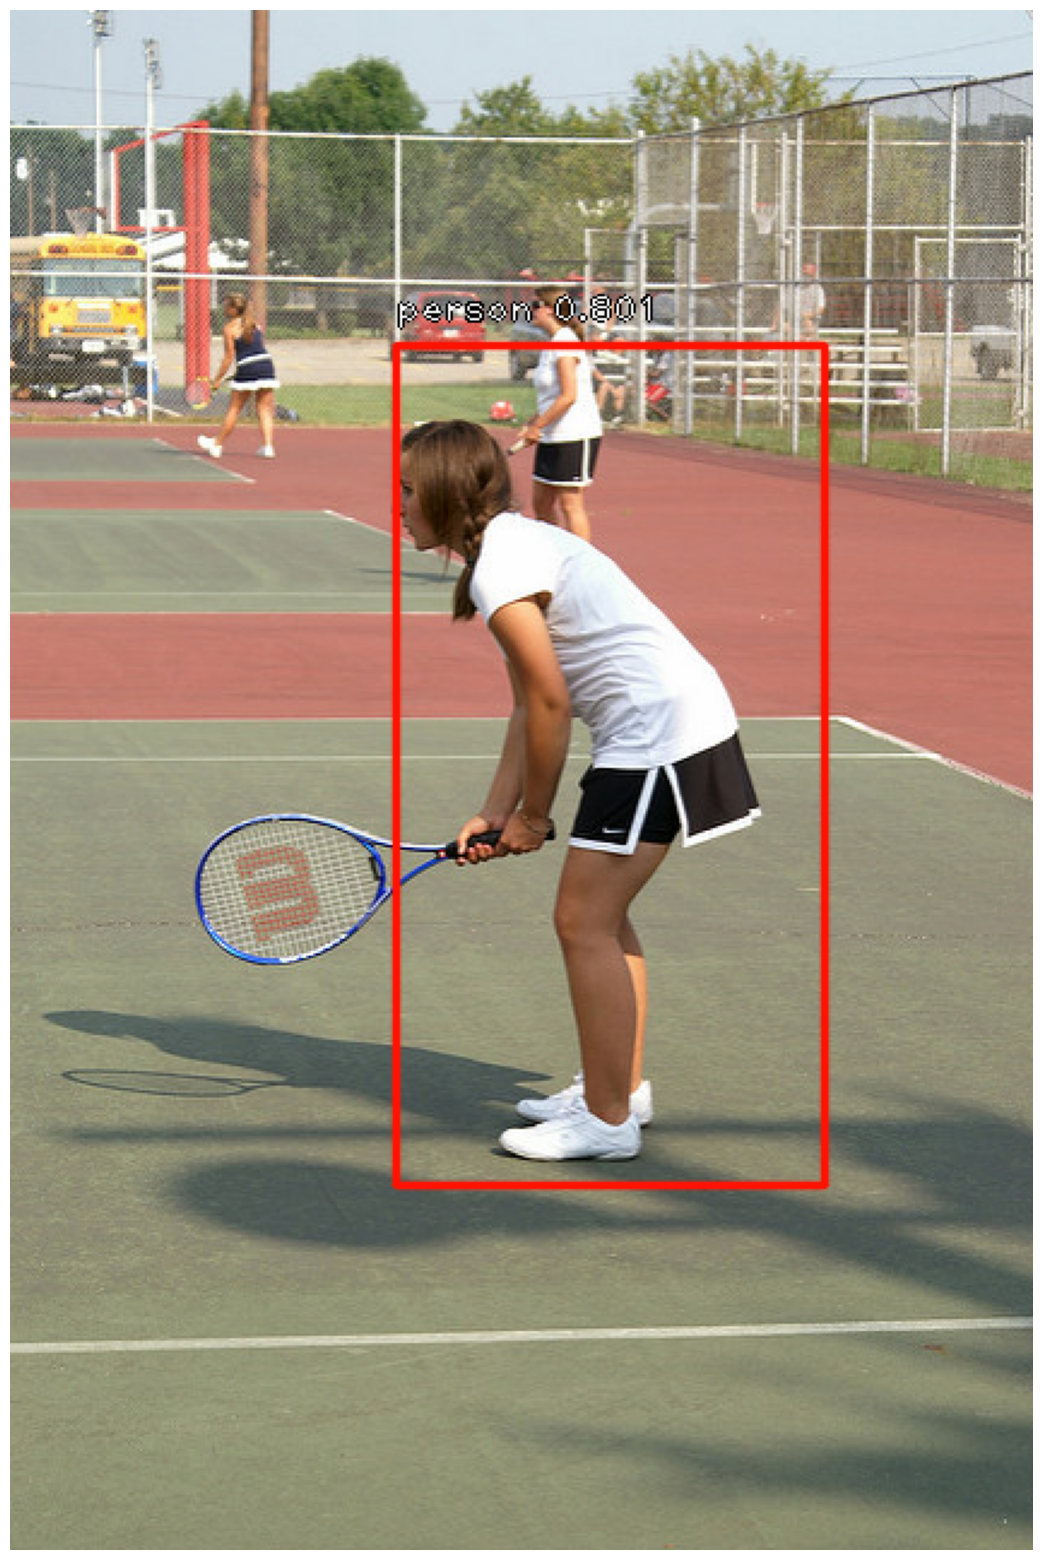

time: 38.6 s (started: 2023-07-29 11:37:23 +00:00)


In [ ]:
# upload an image for testing
uploaded = files.upload()
img_infer = list(uploaded)[0]

print('Running inference on: ' + img_infer)
img_inference(img_infer)

In [ ]:
# Install required libraries
!pip install gtts

# Import the required libraries
from googletrans import Translator
from gtts import gTTS
import IPython.display as ipd


def translate_to_hindi(text):
    translator = Translator()
    translation = translator.translate(text, src='en', dest='hi')
    return translation.text


# Function for speech synthesis (text-to-speech)
def text_to_speech(text, lang='en'):
    tts = gTTS(text=text, lang=lang, slow=False)
    tts.save('output.mp3')
    return 'output.mp3'
!pip install translate
from translate import Translator

def translate_to_hindi(text):
    translator = Translator(from_lang='en', to_lang='hi')
    translation = translator.translate(text)
    returna translation

from keras_retinanet import models
from keras_retinanet.utils.image import preprocess_image, resize_image
import cv2
import numpy as np
import pandas as pd
import pyttsx3

# Function for object detection
def object_detection(frame, model, labels_to_names):
    draw = frame.copy()
    draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)
    image = preprocess_image(frame)
    image, scale = resize_image(image)
    boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
    boxes /= scale

    detected_objects = []
    probabilities = []
    detected_boxes = []

    for box, score, label in zip(boxes[0], scores[0], labels[0]):
        if score < 0.6:
            break
        class_name = labels_to_names[label]
        detected_objects.append(class_name)
        probabilities.append(score)
        detected_boxes.append(box)

        color = (0, 255, 0)  # Green color for bounding box
        b = box.astype(int)
        draw_box(draw, b, color=color)
        caption = "{} {:.3f}".format(class_name, score)
        draw_caption(draw, b, caption)

    return draw, detected_objects, probabilities, detected_boxes

# Function to draw a bounding box
def draw_box(image, box, color):
    b = box.astype(int)
    cv2.rectangle(image, (b[0], b[1]), (b[2], b[3]), color, 3)

# Function to draw caption on the bounding box
def draw_caption(image, box, caption):
    b = box.astype(int)
    cv2.putText(image, caption, (b[0], b[1] - 10), cv2.FONT_HERSHEY_PLAIN, 1.5, (0, 0, 0), 2)
    cv2.putText(image, caption, (b[0], b[1] - 10), cv2.FONT_HERSHEY_PLAIN, 1.5, (255, 255, 255), 1)

# Function to calculate distance using the given formula
def calculate_distance(width, height):
    distance = (2 * 3.14 * 180) / (width + height * 360) * 1000 + 3
    return distance

# Function for real-time webcam input, object detection, translation, and speech synthesis
def webcam_object_detection():
    # Load the RetinaNet model
    model_path = '/content/keras-retinanet/keras_retinanet/bin/snapshots/my_resnet50_csv_05.h5'
    model = models.load_model(model_path, backbone_name='resnet50')

    # Check if the model is a training model; if so, convert it to an inference model
    if 'regression' in model.output_names and 'classification' in model.output_names:
        model = models.convert_model(model)

    labels_to_names = pd.read_csv('/content/keras-retinanet/images/images_set3/classes.csv', header=None).T.loc[0].to_dict()

    # Open the webcam (you can also set it to 0 for the default camera)
    cap = cv2.VideoCapture(0)

    while True:
        # Read a frame from the webcam
        ret, frame = cap.read()

        if not ret:
            break

        # Perform object detection on the frame
        draw, detected_objects, probabilities, detected_boxes = object_detection(frame, model, labels_to_names)

        cv2.imshow('Object Detection', draw)

        # Calculate the distance for the detected boxes
        for class_name, box in zip(detected_objects, detected_boxes):
            width = box[2] - box[0]
            height = box[3] - box[1]
            distance = calculate_distance(width, height)
            print(f"{class_name} - Distance: {distance:.2f} inches")

        # Translate the detected object names from English to Hindi
        translated_objects = [translate_to_hindi(obj) for obj in detected_objects]

        # Combine the translated objects with their probabilities
        translated_results = [f"{obj} {prob:.3f}" for obj, prob in zip(translated_objects, probabilities)]

        # Convert the translated results to speech and play it
        full_text = ' '.join(translated_results)
        engine = pyttsx3.init()
        engine.say(full_text)
        engine.runAndWait()

        # Press 'q' to quit
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

# Run the real-time webcam input and object detection with translation and speech synthesis
webcam_object_detection()


/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


time: 12.6 s (started: 2023-07-29 11:40:29 +00:00)
